### RTRL for <font color=#FF0000>reverse input</font> (with weights on output and input)
while _input_ is **0**, output **1**, and input is **1** then output **0**.

***

#### feedforward
$$s(t) = W_{x} \cdot x(t-1) + W_{y} \cdot y(t-1)$$

$$y(t) = f[s(t)]$$

#### Cost function:
$$J = \frac{1}{2} [y(t) - d(t)]^{2} $$

#### Calculate gradient
$$\frac{\partial{J}} {\partial{W_{*}}} = [y(t) - d(t)] \cdot \frac{ \partial{y(t)} }{ \partial{W_{*}} }$$

\begin{equation}
  \left\{
   \begin{aligned}
   \frac{\partial{y(t)}} {\partial{W_{x}}} =  f\prime [s(t)] \left( \frac{ \partial{y(t-1)} }{ \partial{W_{x}} }  + x(t-1)\right) \\
   \frac{\partial{y(t)}} {\partial{W_{y}}} =  f\prime [s(t)] \left( \frac{ \partial{y(t-1)} }{ \partial{W_{y}} } + y(t-1)\right) \\
   \end{aligned}
   \right.
  \end{equation}

#### Assume
\begin{equation}
  \left\{
   \begin{aligned}
   P_{x}(t) = \frac{\partial{y(t)}} {\partial{W_{x}}} \\
   P_{y}(t) = \frac{\partial{y(t)}} {\partial{W_{y}}} \\
   \end{aligned}
   \right.
  \end{equation}

#### Then we have
\begin{equation}
  \left\{
   \begin{aligned}
   P_{x}(t) =  f\prime [s(t)] \left( P_{x}(t-1)  + x(t-1)\right) \\
   P_{y}(t) =  f\prime [s(t)] \left( P_{y}(t-1) + y(t-1)\right) \\
   \end{aligned}
   \right.
  \end{equation}


#### Error at time *t*:
$$e(t) = y(t)-d(t)$$

#### Update rule:
 \begin{equation}
  \left\{
   \begin{aligned}
   W_{x} = W_{x} - alpha \cdot e(t) \cdot P_{x}(t) \\
   W_{y} = W_{y} - alpha \cdot e(t) \cdot P_{y}(t) \\
   \end{aligned}
   \right.
  \end{equation}

### Code

In [115]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# functions
f = lambda x: 1 / (1+np.exp(-x))
df = lambda x: f(x) * (1-f(x))

In [2]:
def generate_data():
    if np.random.rand()>0.8:
        return (0, 1)
    else:
        return (1, 0)

correct:100/100


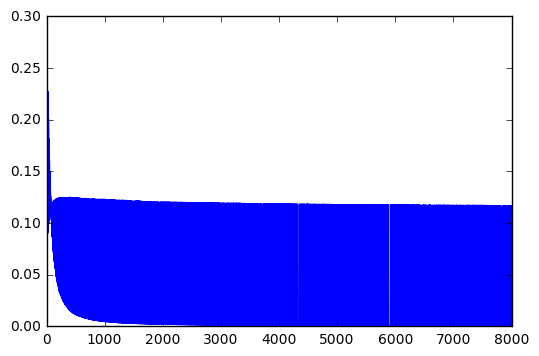

In [113]:
input_units = 1
hidden_units = 1

s = np.zeros((hidden_units, 1))

W_s = np.random.rand(hidden_units, 1) * 2 -1
W_x = np.random.rand(input_units, 1) * 2 -1

P_s = np.zeros((hidden_units, 1))
P_x = np.zeros((input_units, 1))

train_length = 8000
alpha = 0.1
costArr = []

for i in range(train_length):
    (data_x, data_d) = generate_data()

    net = W_s*s + W_x*data_x
    
    s_next = f(net)
    
    P_s[:] = df(net) * [W_s * P_s + s]
    P_x[:] = df(net) * [W_s * P_x + data_x]

    error = s_next - data_d
    
    W_s -= alpha * P_s * error
    W_x -= alpha * P_x * error
    s = s_next
    
    cost = 0.5 * error**2
    costArr.append(cost[0][0])
    
plt.plot(costArr)


# Test
test_length = 100
correct = 0
s = np.zeros((hidden_units, 1))
for i in range(test_length):
    (data_x, data_d) = generate_data()

    net = W_s*s + W_x*data_x  
    s_next = f(net)
    
    s = s_next
    
    predict = int(s_next[0][0]*2)
    
    # print predict == data_d, data_x, data_d, predict, s_next[0][0]
    if predict==data_d:
        correct += 1

print "correct:{}/{}".format(correct, test_length)

In [65]:
test_length = 100
correct = 0
# s = np.zeros((hidden_units, 1))
for i in range(test_length):
    (data_x, data_d) = generate_data()

    net = W_s*s + W_x*data_x  # np.vstack((s, data_x, 1))
    
    s_next = f(net)
    
    s = s_next
    
    predict = int(s_next[0][0]*2)
    
    # print predict == data_d, data_x, data_d, predict, s_next[0][0]
    
    if predict==data_d:
        correct += 1

print "correct:{}/{}".format(correct, test_length)

correct:100/100


In [66]:
print W_s
print W_x

[[ 0.06997933]]
[[-1.27529364]]
